In [ ]:
#standardised
# from sklearn.preprocessing import StandardScaler

# columns_to_scale = ["step", "habit-threshold", "memory-lifetime", "p-interact", 
#                     "incumbent-initial-habit", "social-blindness", 
#                     "cognitive-dissonance-threshold", "network-parameter", 
#                     "social-conformity"]

# scaler = StandardScaler()


# X_scaled = scaler.fit_transform(experiment_data[columns_to_scale])


# experiment_data_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale)


# print(experiment_data_scaled.head())


In [ ]:

# experiment_data_scaled_full = pd.concat(
#     [experiment_data.drop(columns=columns_to_scale), experiment_data_scaled], axis=1
# )


# print(experiment_data_scaled_full.head())



In [ ]:
# import statsmodels
# from statsmodels.formula.api import mixedlm

# model = mixedlm(
#     "Q('mean-oat') ~ step + Q('habit-threshold') + Q('memory-lifetime') + Q('p-interact') + Q('incumbent-initial-habit') + Q('social-blindness') + Q('cognitive-dissonance-threshold') + Q('network-parameter') + Q('social-conformity')",
#     experiment_data,
#     groups=experiment_data["run-number"]
# )


# result = model.fit()
# print(result.summary())



In [ ]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# residuals = result.resid
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.show()


In [2]:
import pandas as pd

# List of file names to process
file_names = [
    "abm_milk_choice_upload experimentCampGrid1-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid2-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid3-table 1.csv",
    "abm_milk_choice_upload experimentCampGrid4-table 1.csv"
]

# Initialize an empty list to store cleaned dataframes
cleaned_dfs = []

# Process each file
for file in file_names:
    # Read the dataset, skipping the first 6 rows
    df = pd.read_csv(file, skiprows=6, sep=",")  # Ensure correct delimiter (adjust to actual file format)
    
    # Check if the dataset was misread as a single column
    if len(df.columns) == 1:
        # Re-read using a different delimiter if necessary
        df = pd.read_csv(file, skiprows=6, sep="\t")
    
    # Standardize column names by stripping whitespace
    df.columns = df.columns.str.strip()
    
    # Append to the cleaned dataframes list
    cleaned_dfs.append(df)

# Align columns by filling missing columns in each dataset with NaN
all_columns = set().union(*[df.columns for df in cleaned_dfs])
aligned_dfs = [df.reindex(columns=all_columns) for df in cleaned_dfs]

# Concatenate all aligned dataframes into one long dataframe
merged_data = pd.concat(aligned_dfs, axis=0, ignore_index=True)

# Display the structure of the merged dataset
print(merged_data.info())
merged_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88320 entries, 0 to 88319
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   count turtles with [color = red]     88320 non-null  int64  
 1   count turtles with [color = yellow]  88320 non-null  int64  
 2   social-susceptibility                88320 non-null  float64
 3   oat-env-mean-initial                 88320 non-null  int64  
 4   almond-health-mean-initial           88320 non-null  int64  
 5   mean-almond                          88320 non-null  float64
 6   social-conformity                    88320 non-null  float64
 7   memory-lifetime                      88320 non-null  int64  
 8   justification                        88320 non-null  float64
 9   [step]                               88320 non-null  int64  
 10  mean-env-impact                      88320 non-null  float64
 11  p-interact                  

,count turtles with [color = red],count turtles with [color = yellow],social-susceptibility,oat-env-mean-initial,almond-health-mean-initial,mean-almond,social-conformity,memory-lifetime,justification,[step],...,mean-health-impact,[run number],incumbent-initial-habit,count turtles with [color = green],mean-soy,cognitive-dissonance-threshold,mean-incum,total-milk,count turtles with [color = white],soy-env-mean-initial
0,1000,0,1.0,1,1,100.000000,-0.6,5,0.9,0,...,29650.000000,4,8,0,100.000000,0.0,2000.000000,2300000.00,0,1
1,977,5,1.0,1,1,100.000000,-0.6,5,0.9,1,...,43.178523,4,8,7,100.000000,0.0,2000.000000,4612603.50,11,1
2,941,21,1.0,1,1,145.024318,-0.6,5,0.9,2,...,42.402201,4,8,16,146.254567,0.0,1894.003148,6943782.70,22,1
3,896,38,1.0,1,1,186.246715,-0.6,5,0.9,3,...,41.039376,4,8,37,188.393580,0.0,1792.392085,9300342.55,29,1
4,879,51,1.0,1,1,220.995573,-0.6,5,0.9,4,...,39.569218,4,8,44,223.059995,0.0,1693.859264,11659668.27,26,1


In [5]:
grouped_data = merged_data.groupby(["[run number]", "[step]"]).mean().reset_index()

In [6]:
grouped_data.head(47)

,[run number],[step],count turtles with [color = red],count turtles with [color = yellow],social-susceptibility,oat-env-mean-initial,almond-health-mean-initial,mean-almond,social-conformity,memory-lifetime,...,social-blindness,mean-health-impact,incumbent-initial-habit,count turtles with [color = green],mean-soy,cognitive-dissonance-threshold,mean-incum,total-milk,count turtles with [color = white],soy-env-mean-initial
0,1,0,1000.00,0.00,0.35,1.0,1.0,100.000000,-0.1,5.0,...,0.4,29650.000000,4.5,0.00,100.000000,0.4,2000.000000,2.300000e+06,0.00,1.0
1,1,1,976.25,9.75,0.35,1.0,1.0,100.000000,-0.1,5.0,...,0.4,43.212387,4.5,7.25,100.000000,0.4,2000.000000,4.611883e+06,6.75,1.0
2,1,2,945.00,18.00,0.35,1.0,1.0,145.951742,-0.1,5.0,...,0.4,42.384037,4.5,19.50,146.258189,0.4,1892.861356,6.943391e+06,17.50,1.0
3,1,3,897.50,38.50,0.35,1.0,1.0,182.189040,-0.1,5.0,...,0.4,41.197602,4.5,34.75,182.721247,0.4,1805.079546,9.296378e+06,29.25,1.0
4,1,4,863.00,46.25,0.35,1.0,1.0,209.539566,-0.1,5.0,...,0.4,40.012925,4.5,48.50,210.121889,0.4,1725.102337,1.165173e+07,42.25,1.0
5,1,5,827.50,65.25,0.35,1.0,1.0,233.663277,-0.1,5.0,...,0.4,38.944711,4.5,59.75,235.504245,0.4,1652.836892,1.400900e+07,47.50,1.0
6,1,6,796.50,67.00,0.35,1.0,1.0,257.914943,-0.1,5.0,...,0.4,37.681308,4.5,76.00,259.197191,0.4,1571.992261,1.635788e+07,60.50,1.0
7,1,7,762.25,90.75,0.35,1.0,1.0,279.621560,-0.1,5.0,...,0.4,36.354340,4.5,86.75,282.972889,0.4,1488.952515,1.869198e+07,60.25,1.0
8,1,8,630.25,17.75,0.35,1.0,1.0,345.726753,-0.1,5.0,...,0.4,34.100501,4.5,16.75,297.513263,0.4,1366.403436,2.099942e+07,335.25,1.0
9,1,9,544.50,178.00,0.35,1.0,1.0,322.837325,-0.1,5.0,...,0.4,32.698221,4.5,223.75,359.055844,0.4,1247.199606,2.329648e+07,53.75,1.0


Correlation Matrix (Parameters vs. Target Variables):
                                mean-incum  mean-oat  mean-almond  mean-soy
social-susceptibility            -0.263418  0.278938     0.168197  0.292495
incumbent-initial-habit          -0.296410  0.312066     0.196047  0.323436
social-conformity                 0.274104 -0.289940    -0.174177 -0.303130
network-parameter                -0.212772  0.223158     0.202603  0.229154
social-blindness                  0.265486 -0.281526    -0.171315 -0.295749
habit-threshold                  -0.263105  0.276579     0.169023  0.289159
p-interact                       -0.080252  0.080986     0.087063  0.085172
cognitive-dissonance-threshold    0.264754 -0.275767    -0.172324 -0.293124


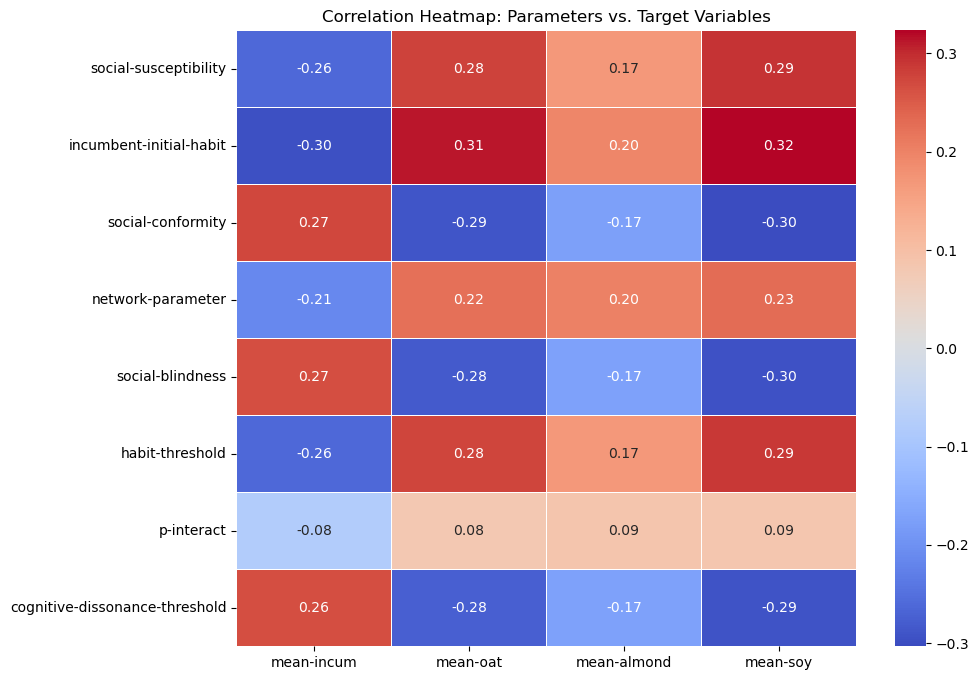

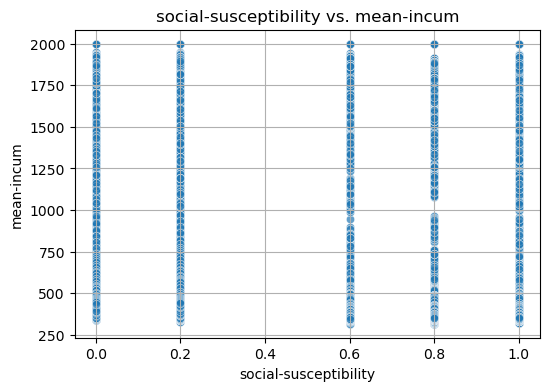

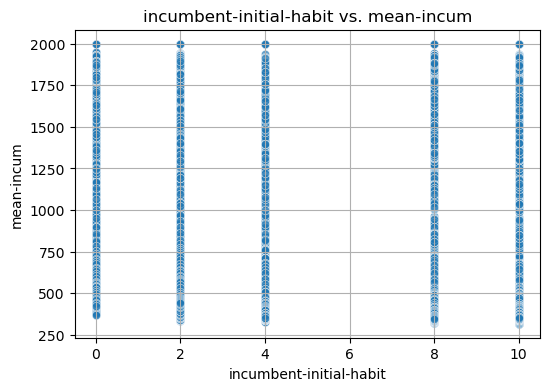

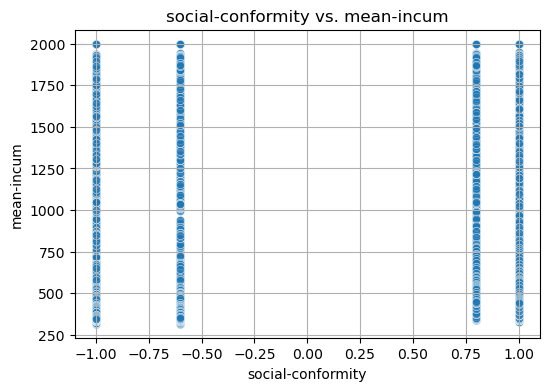

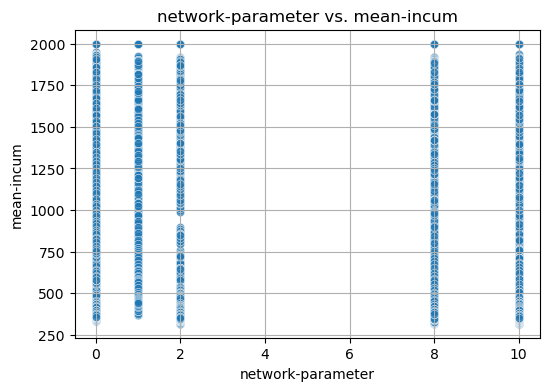

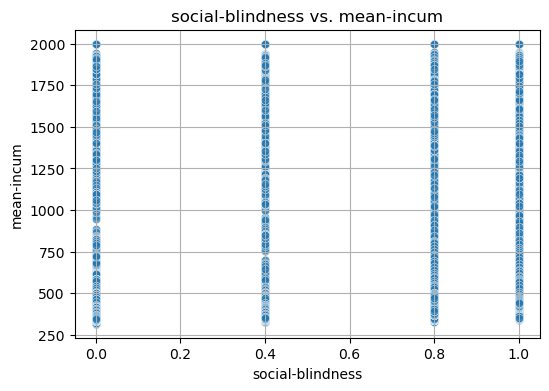

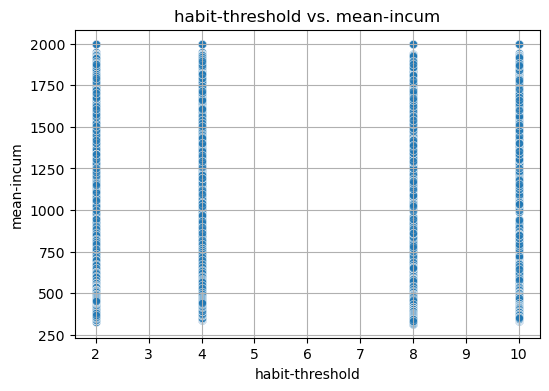

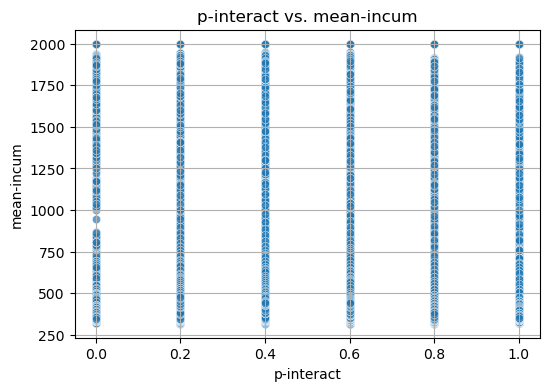

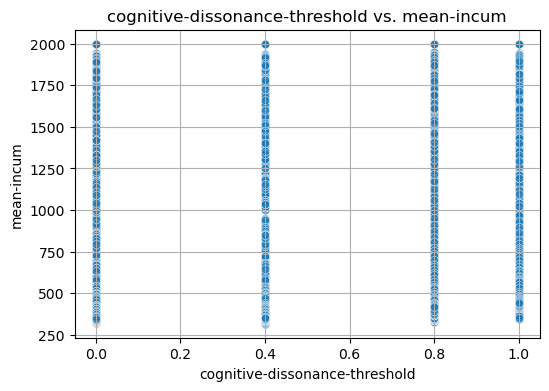

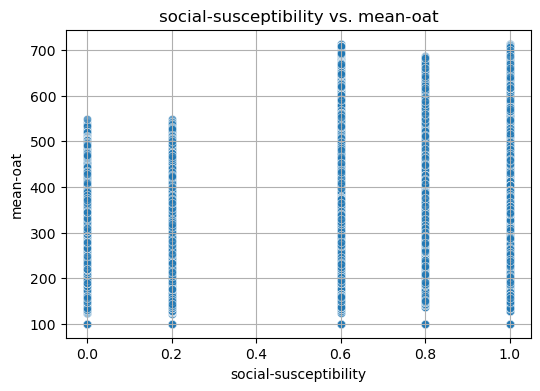

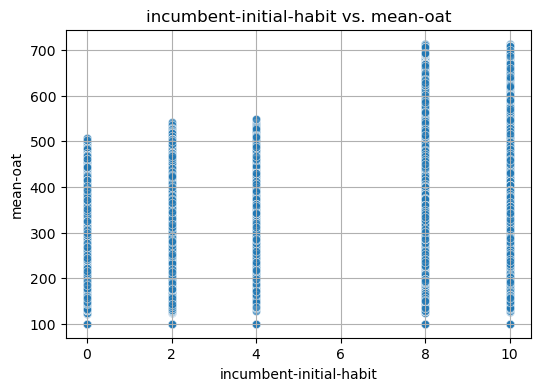

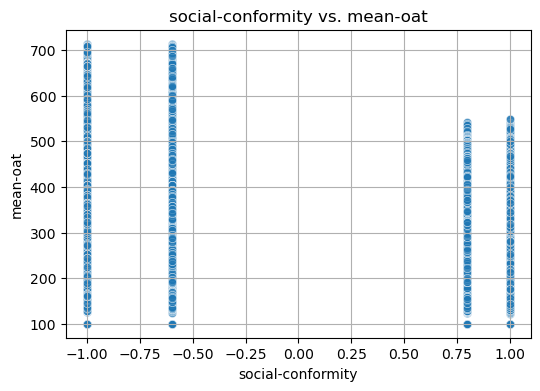

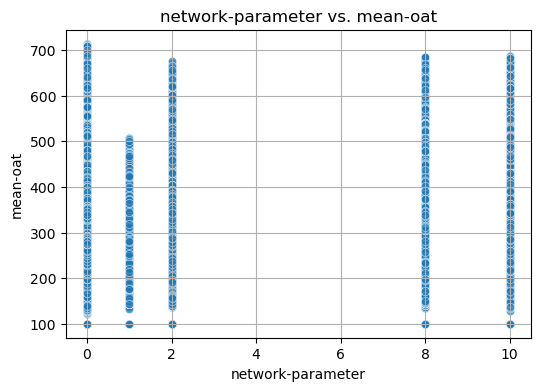

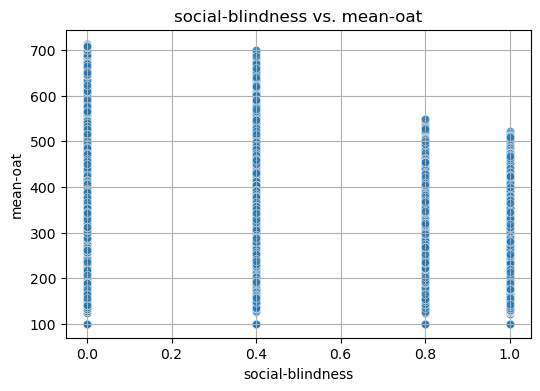

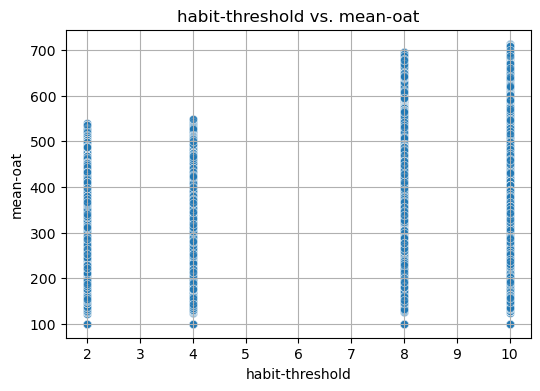

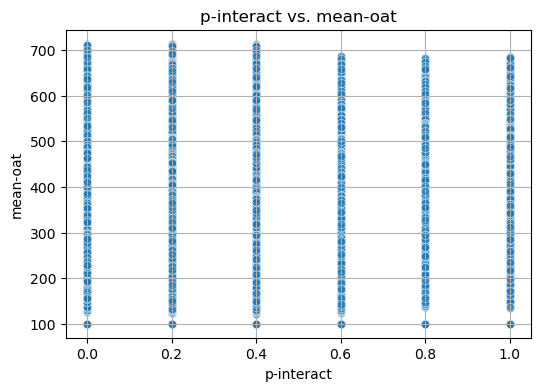

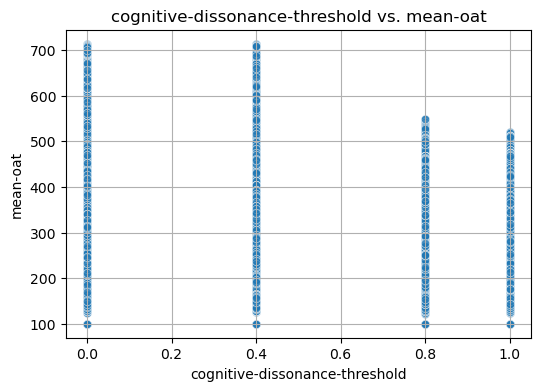

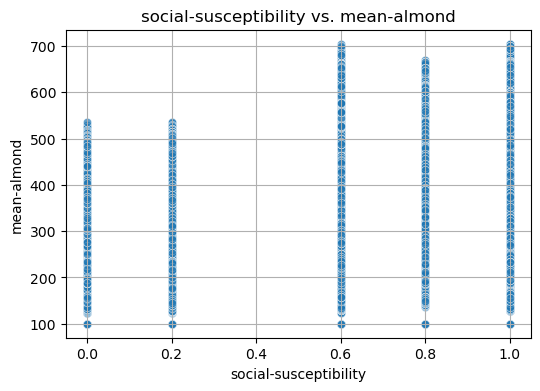

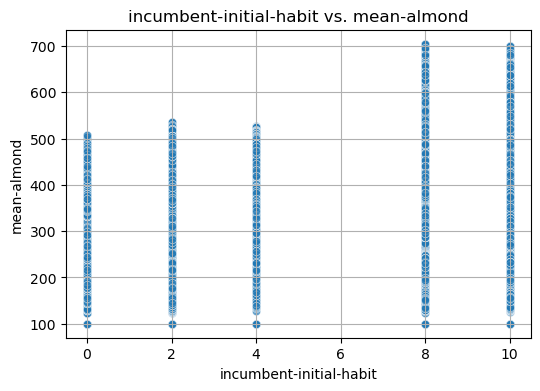

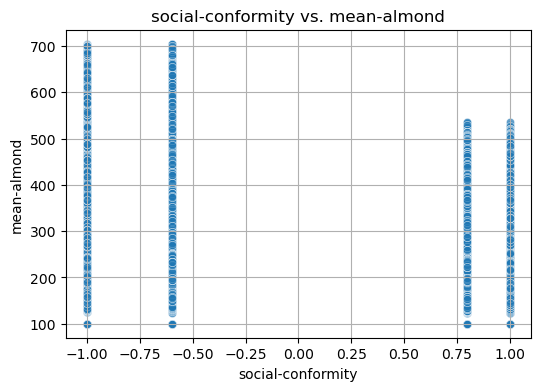

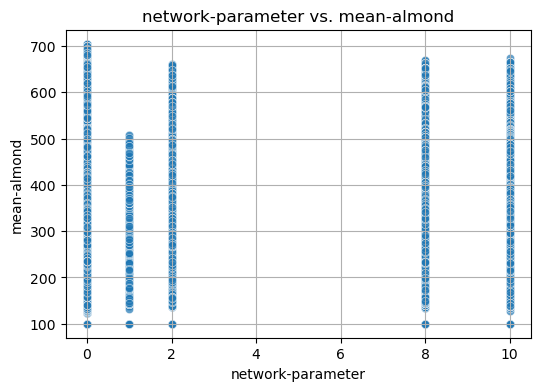

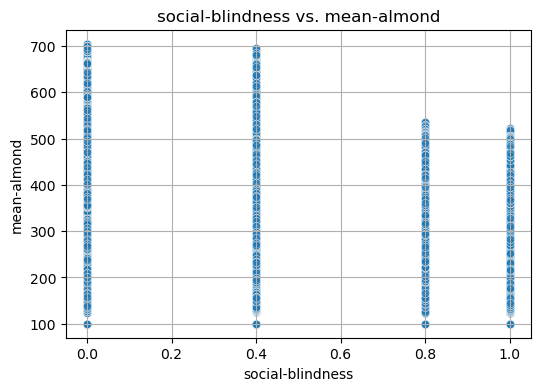

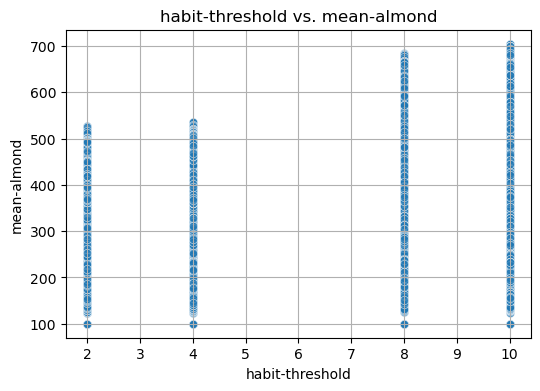

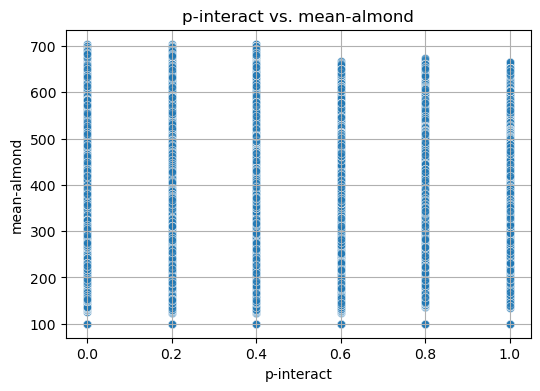

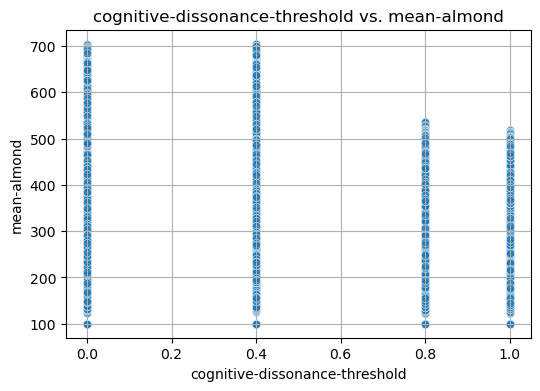

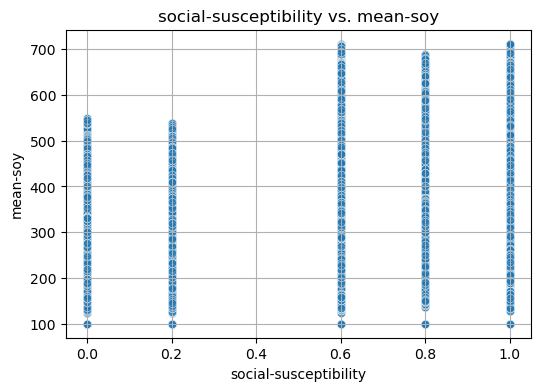

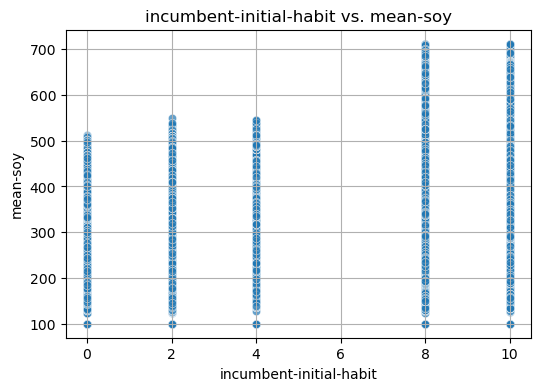

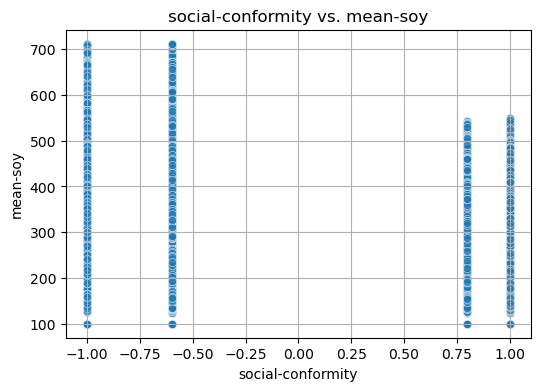

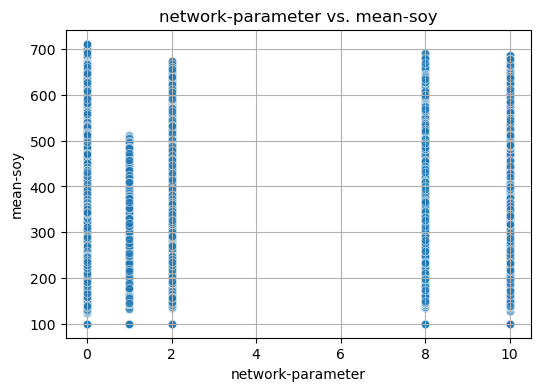

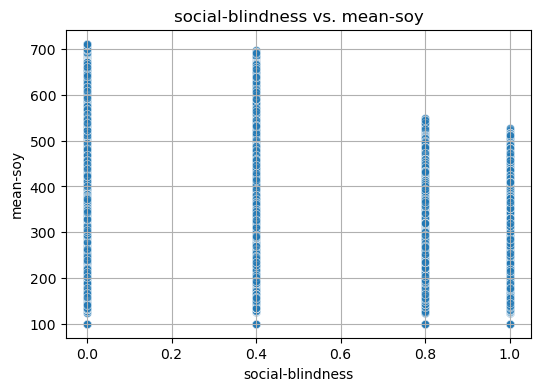

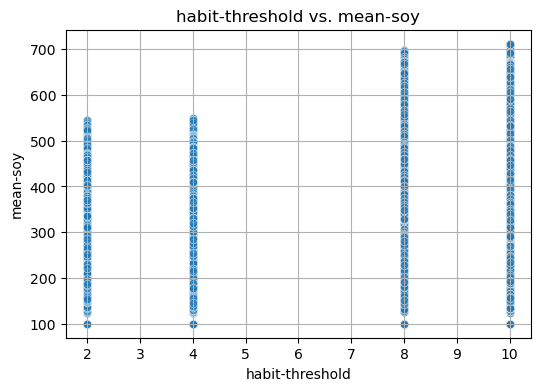

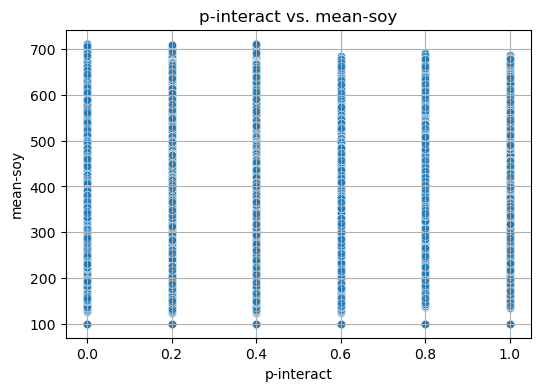

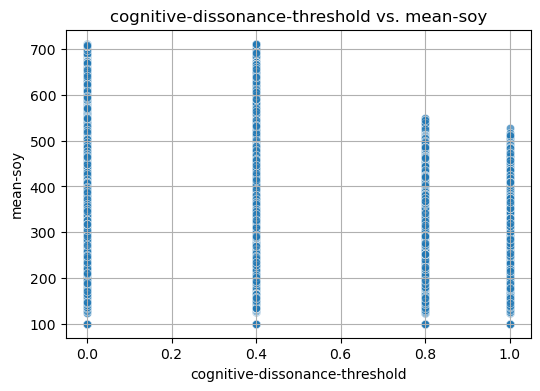

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Target variables
target_variables = ['mean-incum','mean-oat', 'mean-almond', 'mean-soy']
# Parameters of interest
parameters = [
    'social-susceptibility', 'incumbent-initial-habit', 'social-conformity',
    'network-parameter', 'social-blindness', 'habit-threshold',
    'p-interact', 'cognitive-dissonance-threshold'
]

# Step 1: Correlation analysis
# Calculate correlations between parameters and target variables
correlation_matrix = merged_data[parameters + target_variables].corr()

# Display correlations of parameters with target variables
print("Correlation Matrix (Parameters vs. Target Variables):")
correlation_params_to_targets = correlation_matrix.loc[parameters, target_variables]
print(correlation_params_to_targets)

# Step 2: Heatmap for correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_params_to_targets, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Parameters vs. Target Variables")
plt.show()

# Step 3: Scatter plots for individual parameters vs. target variables
for target in target_variables:
    for param in parameters:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=merged_data, x=param, y=target, alpha=0.7)
        plt.title(f"{param} vs. {target}")
        plt.xlabel(param)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

# Step 4: Line plots for parameter effects over time
if 'step' in merged_data.columns:
    for target in target_variables:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=merged_data, x='step', y=target, hue='run number', legend=False, alpha=0.5)
        plt.title(f"Temporal Trends of {target}")
        plt.xlabel('Time (Step)')
        plt.ylabel(target)
        plt.grid(True)
        plt.show()


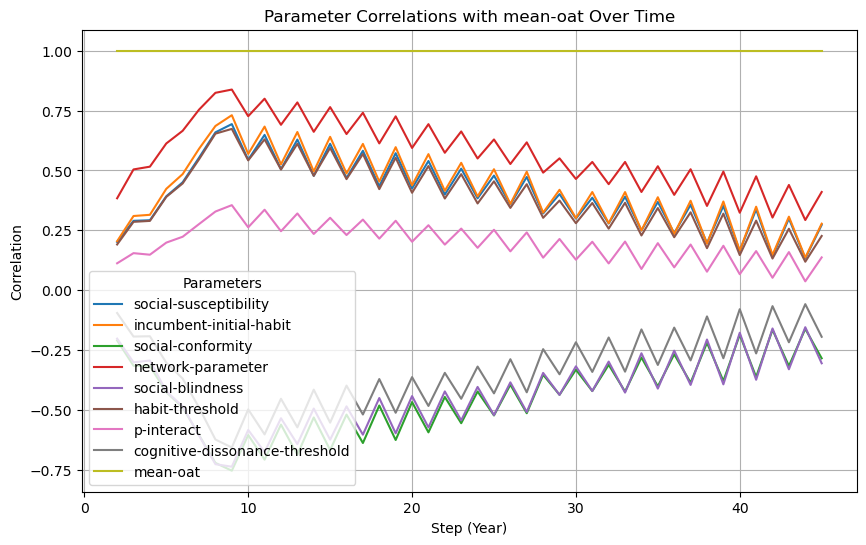

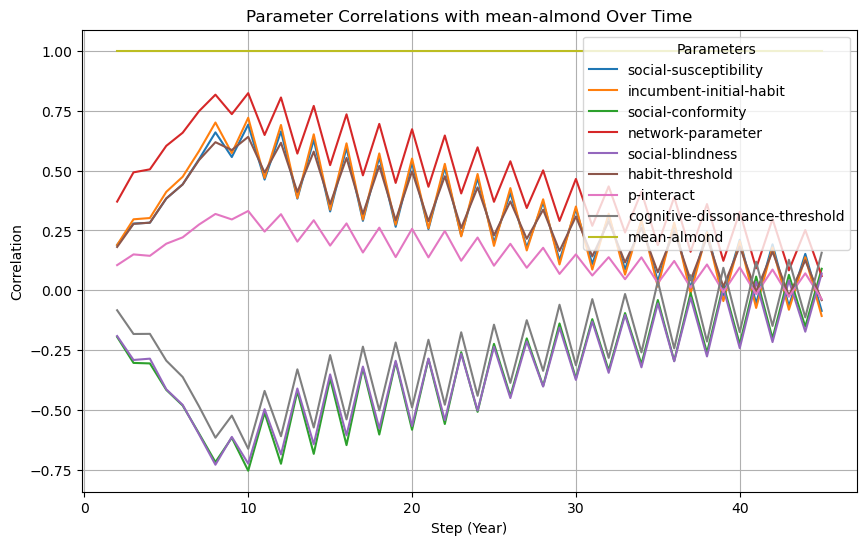

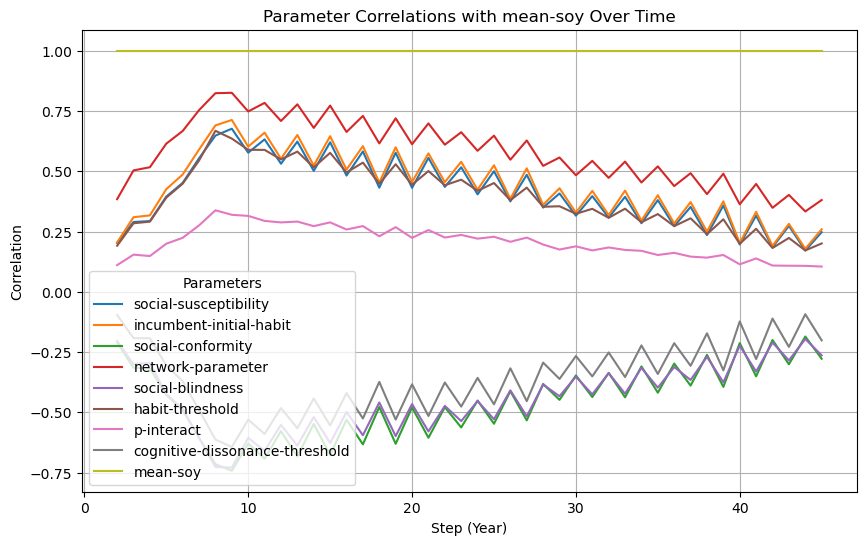

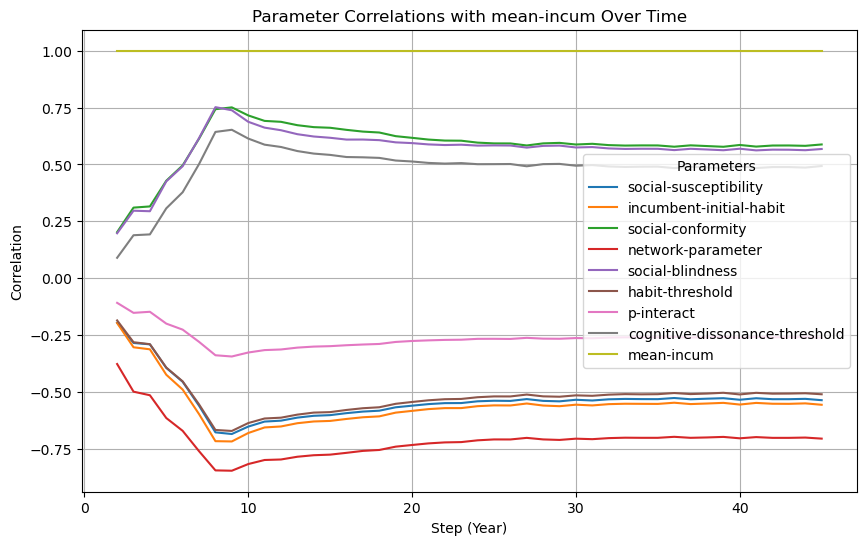

In [7]:
# 初始化字典存储每个目标变量的时间相关性
time_correlations = {target: {} for target in ['mean-oat', 'mean-almond', 'mean-soy', 'mean-incum']}

# 计算每个 step 的相关性
for step in grouped_data['[step]'].unique():
    step_data = grouped_data[grouped_data['[step]'] == step]
    for target in time_correlations.keys():
        correlation = step_data[[
            'social-susceptibility', 'incumbent-initial-habit', 'social-conformity',
            'network-parameter', 'social-blindness', 'habit-threshold',
            'p-interact', 'cognitive-dissonance-threshold',
            target
        ]].corr()
        time_correlations[target][step] = correlation[target]

# 转为 DataFrame
time_corr_dfs = {target: pd.DataFrame(data).T for target, data in time_correlations.items()}

# 可视化：各目标变量与参数的动态相关性
import matplotlib.pyplot as plt

for target, time_corr_df in time_corr_dfs.items():
    plt.figure(figsize=(10, 6))
    time_corr_df.plot(ax=plt.gca())
    plt.title(f"Parameter Correlations with {target} Over Time")
    plt.xlabel("Step (Year)")
    plt.ylabel("Correlation")
    plt.legend(title="Parameters")
    plt.grid()
    plt.show()



In [19]:
from statsmodels.formula.api import ols

# Assuming param1 and param2 are the parameters causing periodic behavior
formula = "Q('mean-oat') ~ Q('social-susceptibility') + Q('social-conformity')+Q('network-parameter') + Q('incumbent-initial-habit') + Q('network-parameter'):Q('incumbent-initial-habit')"

interaction_model = ols(formula, data=grouped_data).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:          Q('mean-oat')   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1379.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:40:29   Log-Likelihood:            -2.1049e+05
No. Observations:               35328   AIC:                         4.210e+05
Df Residuals:                   35322   BIC:                         4.210e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

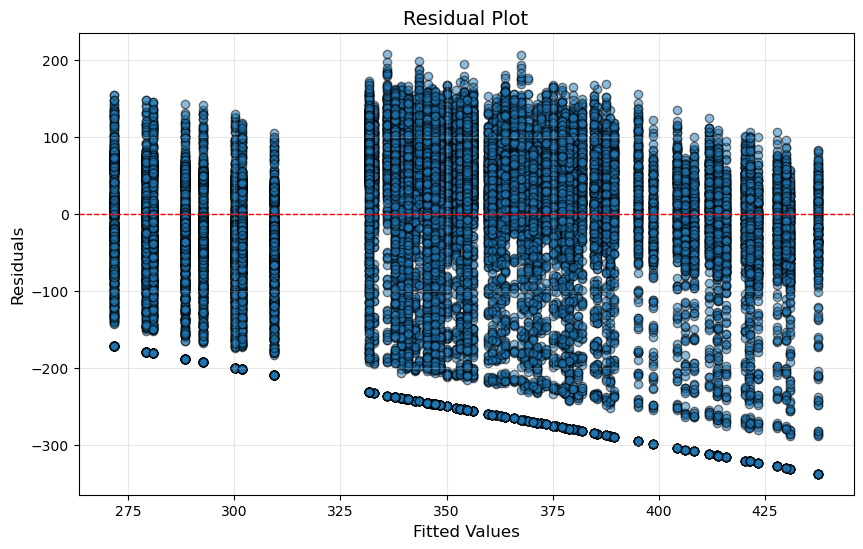

In [20]:
# Extract residuals from the model
residuals = interaction_model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(interaction_model.fittedvalues, residuals, alpha=0.5, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residual Plot", fontsize=14)
plt.xlabel("Fitted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [32]:
import statsmodels
from statsmodels.formula.api import mixedlm
model = mixedlm(
    "Q('mean-oat') ~ Q('[step]') + Q('habit-threshold') + Q('memory-lifetime') + Q('incumbent-initial-habit') + Q('social-blindness') +  + Q('network-parameter') + Q('social-conformity')",
    grouped_data,
    groups=grouped_data["[run number]"]
)


result = model.fit()
print(result.summary())

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            Q('mean-oat')
No. Observations:              35328              Method:                        REML         
No. Groups:                    768                Scale:                         6152.9571    
Min. group size:               46                 Log-Likelihood:                -205001.3505 
Max. group size:               46                 Converged:                     No           
Mean group size:               46.0                                                           
----------------------------------------------------------------------------------------------
                               Coef.     Std.Err.      z    P>|z|     [0.025         0.975]   
----------------------------------------------------------------------------------------------
Intercept                    -4970.945 56699460.898  -0.000 1.000 -111133872.24

/opt/conda/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.formula.api import mixedlm

# Step 1: Standardize the continuous variables
scaler = StandardScaler()
scaled_data = grouped_data.copy()
scaled_columns = [
    "Q('[step]')", "Q('habit-threshold')", "Q('memory-lifetime')", 
    "Q('incumbent-initial-habit')", "Q('social-blindness')", 
    "Q('network-parameter')", "Q('social-conformity')"
]
scaled_data[scaled_columns] = scaler.fit_transform(scaled_data[scaled_columns])

# Step 2: Fit a simplified mixed-effects model
formula = (
    "Q('mean-oat') ~ Q('[step]') + Q('habit-threshold') + "
    "Q('incumbent-initial-habit') + Q('network-parameter')+Q('social-blindness')"
)
model = mixedlm(
    formula=formula,
    data=scaled_data,
    groups=scaled_data["[run number]"]
)

# Step 3: Specify optimization settings
result = model.fit(method="lbfgs", maxiter=1000)
print(result.summary())


KeyError: "None of [Index(['Q('[step]')', 'Q('habit-threshold')', 'Q('memory-lifetime')',\n       'Q('incumbent-initial-habit')', 'Q('social-blindness')',\n       'Q('network-parameter')', 'Q('social-conformity')'],\n      dtype='object')] are in the [columns]"